# Import dependencies and mount Drive

In [0]:
from string import punctuation
import os
import re
import time
import datetime
from os import listdir
from random import shuffle

from string import punctuation
from os import listdir
from collections import Counter
import nltk
from nltk.corpus import stopwords
from nltk.util import ngrams

import string
from sklearn.model_selection import train_test_split
from sklearn import metrics

import numpy as np
from numpy import array
from numpy import asarray
from numpy import zeros
import pandas as pd

!pip install tensorflow==1.15 as tf
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.models import Sequential
from keras.layers import Dense, Activation, Flatten, Embedding, Dropout, LSTM, Bidirectional
from keras.layers.convolutional import Conv1D
from keras.layers.convolutional import MaxPooling1D

import matplotlib.pyplot as plt
import seaborn as sns

# !pip install h5py pyyaml 

In [0]:
# nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [0]:
# Mount Drive
from google.colab import drive
drive.mount('/content/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/gdrive


In [0]:
# Establish working directory
%cd /content/gdrive/My\ Drive/MSDS422/weekeight
!pwd
!ls
print('Working Directory')
print(os.getcwd())
work_dir = "/content/gdrive/My\ Drive/MSDS422/weekeight"
# # data_dir = work_dir +"data/"
# chp_id = "rnn"

/content/gdrive/My Drive/MSDS422/weekeight
/content/gdrive/My Drive/MSDS422/weekeight
input  results	vocab.txt
Working Directory
/content/gdrive/My Drive/MSDS422/weekeight


# Define functions

In [0]:
# Load doc into memory
def load_doc(filename):
	# open the file as read only
	file = open(filename, 'r')
	# read all text
	text = file.read()
	# close the file
	file.close()
	return text
 
# Turn a doc into clean tokens
def clean_doc(doc):
	# split into tokens by white space
	tokens = doc.split()
	# remove punctuation from each token
	table = str.maketrans('', '', punctuation)
	tokens = [w.translate(table) for w in tokens]
	# remove remaining tokens that are not alphabetic
	tokens = [word for word in tokens if word.isalpha()]
	# filter out stop words
	stop_words = set(stopwords.words('english'))
 	# stop_words = stop_words.extend(newStopWords)
	tokens = [w for w in tokens if not w in stop_words]
	# filter out short tokens
	tokens = [word for word in tokens if len(word) > 1]
	return tokens

# Load doc and add to vocab
def add_doc_to_vocab(filename, vocab):
	# load doc
	doc = load_doc(filename)
	# clean doc
	tokens = clean_doc(doc)
	# update counts
	vocab.update(tokens)
 
# Load all docs in a directory
def process_docs(directory, vocab):
	# walk through all files in the folder
	for filename in listdir(directory):
		# # skip any reviews in the test set
		# if is_train:
		# 	continue
		# if not is_train:
		# 	continue
		# create the full path of the file to open
		path = directory + '/' + filename
		# add doc to vocab
		add_doc_to_vocab(path, vocab)


# Explore and define vocabulary

In [0]:
# Define vocab
vocab = Counter()
# Add all docs to vocab
process_docs('input/rnn/movie-reviews-negative', vocab)
process_docs('input/rnn/movie-reviews-positive', vocab)

In [0]:
# Print the size of the vocab
print(len(vocab))

# Print the top words in the vocab
print(vocab.most_common(50))

20433
[('br', 2020), ('The', 1645), ('movie', 1490), ('film', 1449), ('one', 916), ('like', 716), ('This', 601), ('good', 560), ('story', 486), ('even', 445), ('It', 429), ('would', 421), ('see', 417), ('time', 415), ('really', 413), ('films', 353), ('great', 343), ('much', 334), ('get', 315), ('first', 314), ('bad', 309), ('movies', 309), ('made', 307), ('also', 303), ('people', 294), ('could', 288), ('make', 287), ('seen', 283), ('well', 278), ('two', 276), ('dont', 275), ('think', 272), ('characters', 271), ('plot', 269), ('acting', 266), ('character', 252), ('But', 250), ('many', 246), ('Its', 246), ('way', 246), ('And', 242), ('never', 232), ('little', 228), ('life', 223), ('watch', 222), ('love', 221), ('ever', 217), ('scene', 211), ('better', 210), ('best', 205)]


### Figure 1: Most common 20 words in reviews

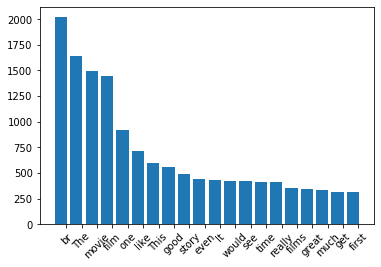

In [0]:
# Visualize 20 most common words
plot_words = dict(Counter(vocab).most_common(20))
labels, values = zip(*plot_words.items())

# Sort values in descending order
indSort = np.argsort(values)[::-1]

# Rearrange data
labels = np.array(labels)[indSort]
values = np.array(values)[indSort]
indexes = np.arange(len(labels))

# Plot and add labels
bar_width = 0.35
plt.bar(indexes, values)
# fig = plt.figure(figsize=(6,3))
plt.xticks(indexes + bar_width, labels, rotation=45)
# xticks(rotation=45) rotate x-axis labels by 45 degrees
plt.show()

In [0]:
# Print the 50 least common words
n = 50
print(vocab.most_common()[:-n-1:-1])

[('interference', 1), ('sexiness', 1), ('lighter', 1), ('Morricone', 1), ('outfits', 1), ('Fabulous', 1), ('quibbles', 1), ('unforgivable', 1), ('Convoluted', 1), ('figurine', 1), ('videoDVD', 1), ('unavailable', 1), ('sporadic', 1), ('Valentinestyle', 1), ('fatigues', 1), ('delicately', 1), ('sugarcoated', 1), ('temptations', 1), ('rammed', 1), ('Amenabar', 1), ('Majorettes', 1), ('crossbreed', 1), ('swaps', 1), ('entices', 1), ('heralds', 1), ('concrete', 1), ('template', 1), ('Kruegar', 1), ('clawfingered', 1), ('bogeyman', 1), ('playgroundbr', 1), ('maniacs', 1), ('panicstricken', 1), ('jogging', 1), ('creepilymasked', 1), ('Predator', 1), ('Schwarzenegger', 1), ('approached', 1), ('excels', 1), ('dorm', 1), ('Madrid', 1), ('assassinbr', 1), ('malevolent', 1), ('homicidal', 1), ('Hunters', 1), ('remoteness', 1), ('storekeeper', 1), ('armoury', 1), ('adversarybr', 1), ('proposes', 1)]


In [0]:
# Keep tokens with a minimum occurrence
min_occurrence = 2
tokens = [k for k,c in vocab.items() if c >= min_occurrence]
print(len(tokens))

9588


In [0]:
# Save list to file
def save_list(lines, filename):
	# convert lines to a single blob of text
	data = '\n'.join(lines)
	# open file
	file = open(filename, 'w')
	# write text
	file.write(data)
	# close file
	file.close()
 
# Save tokens to a vocabulary file
save_list(tokens, 'vocab.txt')

# Pre-processing functions

In [0]:
# Turn a doc into clean tokens
def clean_doc(doc, vocab):
	# split into tokens by white space
	tokens = doc.split()
	# remove punctuation from each token
	table = str.maketrans('', '', punctuation)
	tokens = [w.translate(table) for w in tokens]
	# filter out tokens not in vocab
	tokens = [w for w in tokens if w in vocab]
	tokens = ' '.join(tokens)
	return tokens
 
# Load all docs in a directory
def process_docs(directory, vocab):
	documents = list()
	# walk through all files in the folder
	for filename in listdir(directory):
		# # skip any reviews in the test set
		# if is_trian and filename.startswith('cv9'):
		# 	continue
		# if not is_trian and not filename.startswith('cv9'):
		# 	continue
		# # create the full path of the file to open
		path = directory + '/' + filename
		# load the doc
		doc = load_doc(path)
		# clean doc
		tokens = clean_doc(doc, vocab)
		# add to list
		documents.append(tokens)
	return documents
 

# Load train and test data

In [0]:
# Load the vocabulary
vocab_filename = 'vocab.txt'
vocab = load_doc(vocab_filename)
vocab = vocab.split()
vocab = set(vocab)


In [0]:
# Load all training reviews
positive_docs = process_docs('input/rnn/movie-reviews-positive', vocab)
negative_docs = process_docs('input/rnn/movie-reviews-negative', vocab)


In [0]:
# Assign training reviews
train_positive = positive_docs[100:]
train_negative = negative_docs[100:]
train_docs = train_positive + train_negative

# Create the tokenizer
tokenizer = Tokenizer()
# Fit the tokenizer on the documents
tokenizer.fit_on_texts(train_docs)
 
# Sequence encode
encoded_docs = tokenizer.texts_to_sequences(train_docs)

# Pad sequences
max_length = max([len(s.split()) for s in train_docs])

X_train = pad_sequences(encoded_docs, maxlen=max_length, padding='post')

# Define training labels
y_train = array([0 for _ in range(400)] + [1 for _ in range(400)])


In [0]:
# Load all test reviews
test_positive = positive_docs[:100]
test_negative = negative_docs[:100]
test_docs = test_positive + test_negative

# Sequence encode
encoded_docs = tokenizer.texts_to_sequences(test_docs)

# Pad sequences
X_test = pad_sequences(encoded_docs, maxlen=max_length, padding='post')
# Define test labels
y_test = array([0 for _ in range(100)] + [1 for _ in range(100)])
 

In [0]:
print("Train and test dataset shapes:")
print("X_train: " + str(X_train.shape))
print("X_test: " + str(X_test.shape))
print("y_train: " + str(y_train.shape))
print("y_test: " + str(y_test.shape))

Train and test dataset shapes:
X_train: (800, 588)
X_test: (200, 588)
y_train: (800,)
y_test: (200,)


In [0]:
# Define vocabulary size (largest integer value)
vocab_size = len(tokenizer.word_index) + 1

# Prepare pre-trained embeddings

In [0]:
# Load embedding as a dict
def load_embedding(filename):
	# load embedding into memory, skip first line
	file = open(filename,'r')
	lines = file.readlines()
	file.close()
	# create a map of words to vectors
	embedding = dict()
	for line in lines:
		parts = line.split()
		# key is string word, value is numpy array for vector
		embedding[parts[0]] = asarray(parts[1:], dtype='float32')
	return embedding

In [0]:
# Create a weight matrix for the Embedding layer from a loaded embedding
def get_weight_matrix(embedding, vocab):
	# total vocabulary size plus 0 for unknown words
	vocab_size = len(vocab) + 1
	# define weight matrix dimensions with all 0
	# weight_matrix = zeros((vocab_size, 100))
	weight_matrix = zeros((vocab_size, 300))
	# step vocab, store vectors using the Tokenizer's integer mapping
	for word, i in vocab.items():
		vector = embedding.get(word)
		if vector is not None:
			weight_matrix[i] = vector
	return weight_matrix

In [0]:
# Load 100d embedding from file
raw_embedding_small = load_embedding('input/rnn/embeddings/gloVe.6B/glove.6B.100d.txt')
# Get vectors in the right order
embedding_vectors_small = get_weight_matrix(raw_embedding_small, tokenizer.word_index)
# Create the embedding layer
embedding_layer_small = Embedding(vocab_size, 100, weights=[embedding_vectors_small], input_length=max_length, trainable=False)

In [0]:
# Load 300d embedding from file
raw_embedding_large = load_embedding('input/rnn/embeddings/gloVe.6B/glove.6B.300d.txt')
# Get vectors in the right order
embedding_vectors_large = get_weight_matrix(raw_embedding_large, tokenizer.word_index)
# Create the embedding layer
embedding_layer_large = Embedding(vocab_size, 300, weights=[embedding_vectors_large], input_length=max_length, trainable=False)

# Model 1: learned embeddings with LSTM + sigmoid activation

In [0]:
max_features = 20000

model_1 = Sequential()
model_1.add(Embedding(max_features, 128, input_length=max_length))
model_1.add(Bidirectional(LSTM(64)))
model_1.add(Dropout(0.5))
model_1.add(Dense(1, activation='sigmoid'))
print(model_1.summary())

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_4 (Embedding)      (None, 588, 128)          2560000   
_________________________________________________________________
bidirectional_2 (Bidirection (None, 128)               98816     
_________________________________________________________________
dropout_2 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 129       
Total params: 2,658,945
Trainable params: 2,658,945
Non-trainable params: 0
_________________________________________________________________
None


In [0]:
# Compile model
model_1.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [0]:
# Fit network
start_time = time.time()
history = model_1.fit(X_train, y_train, epochs=10, batch_size=64, verbose=2)
elapsed_time = time.time() - start_time
print('--------------------------')
print('Training time in seconds: ', round(elapsed_time,2))
print('--------------------------')

# Save models locally after fitting
save_dir = "results/"
model_name = 'keras_rnn_model_1.h5'
model_path = os.path.join(save_dir, model_name)
model_1.save(model_path)
print('Saved trained model at %s ' % model_path)
print('--------------------------')

Epoch 1/10
 - 26s - loss: 0.6930 - acc: 0.5012
Epoch 2/10
 - 25s - loss: 0.6777 - acc: 0.6950
Epoch 3/10
 - 25s - loss: 0.6540 - acc: 0.7925
Epoch 4/10
 - 25s - loss: 0.5212 - acc: 0.8825
Epoch 5/10
 - 25s - loss: 0.3869 - acc: 0.9700
Epoch 6/10
 - 25s - loss: 0.1809 - acc: 0.9750
Epoch 7/10
 - 25s - loss: 0.0927 - acc: 0.9888
Epoch 8/10
 - 26s - loss: 0.0514 - acc: 0.9950
Epoch 9/10
 - 25s - loss: 0.0339 - acc: 0.9988
Epoch 10/10
 - 25s - loss: 0.0242 - acc: 0.9975
--------------------------
Training time in seconds:  254.27
--------------------------
Saved trained model at results/keras_rnn_model_1.h5 
--------------------------


In [0]:
# Final evaluation of the model
scores = model_1.evaluate(X_test, y_test, verbose=0)
print('Testing scores:')
# print("Baseline Error: %.4f" % (100-scores[1]*100))
print("Accuracy score: %.4f" % scores[1])
print("Loss: %.4f" % scores[0])

Testing scores:
Accuracy score: 0.8850
Loss: 0.3303


In [0]:
# # Loads the weights
# checkpoint_path = model_path = "results/keras_rnn_model_1.h5"
# # model_name = 'keras_rnn_model_1.h5'
# model_1.load_weights(checkpoint_path)

# # Re-evaluate the model
# scores_revised = model_1.evaluate(X_test, y_test, verbose=0)
# print('Testing scores:')
# print("Accuracy score: %.4f" % scores_revised[1])
# print("Loss: %.4f" % scores_revised[0])

Testing scores:
Accuracy score: 0.8850
Loss: 0.3303


### Figure 2: Learning curves for model 1

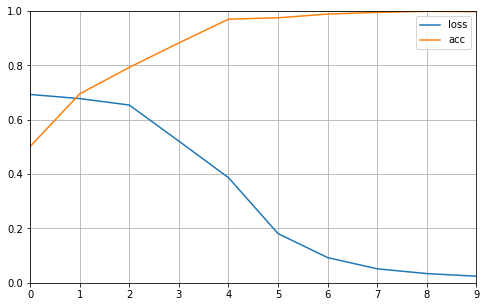

In [0]:
# Plot learning curves
pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1) # set the vertical range to [0-1]
plt.show()

In [0]:
# Make test predictions
y_pred = model_1.predict(X_test)

In [0]:
# Remember, we mapped the positive outputs to 1 and the negative outputs to 0. However, the sigmoid function predicts floating 
# value between 0 and 1. If the value is less than 0.5, the sentiment is considered negative where as if the value is 
# greater than 0.5, the sentiment is considered as positive. The sentiment value for our single instance is 0.33 which means 
# that our sentiment is predicted as negative, which actually is the case.

Positive outputs are mapped to 1 and negative outputs to 0. However, the sigmoid function predicts a floating value between 0 and 1. If the value is less than 0.5, the sentiment is considered negative where as if the value is 
greater than 0.5, the sentiment is considered as positive.

In [0]:
# Test on 2 reviews
print('Predicted prediction:')
print(y_pred[99])
print('----------')
print('Review text:')
print(test_docs[99])
print('----------')
print('Predicted prediction:')
print(y_pred[187])
print('----------')
print('Review text:')
print(test_docs[187])

Predicted prediction:
[0.06757104]
----------
Review text:
Although obviously lowbudget production performances songs movie worth seeing One Walkens musical roles date marvelous dancer singer demonstrates skills well watch Also starring Jason Connery great childrens story likable characters
----------
Predicted prediction:
[0.04520619]
----------
Review text:
premise rates low unfortunately also struggles raise laughs interest Only Hawns wellknown charm allows thin ice Goldies gotta contender actress whos done much career little quality material br


# Model 2: pre-trained embeddings (100d) with LSTM + sigmoid activation

In [0]:
# Define model
model_2 = Sequential()
model_2.add(embedding_layer_small)
model_2.add(Bidirectional(LSTM(64)))
model_2.add(Dropout(0.5))
model_2.add(Dense(1, activation='sigmoid'))
print(model_2.summary())

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 588, 100)          845200    
_________________________________________________________________
bidirectional_3 (Bidirection (None, 128)               84480     
_________________________________________________________________
dropout_3 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 129       
Total params: 929,809
Trainable params: 84,609
Non-trainable params: 845,200
_________________________________________________________________
None


In [0]:
# Compile model
model_2.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [0]:
# Fit network
start_time = time.time()
history = model_2.fit(X_train, y_train, epochs=10, batch_size=64, verbose=2)
elapsed_time = time.time() - start_time
print('--------------------------')
print('Training time in seconds: ', round(elapsed_time,2))
print('--------------------------')

# Save models locally after fitting
save_dir = "results/"
model_name = 'keras_rnn_model_2.h5'
model_path = os.path.join(save_dir, model_name)
model_2.save(model_path)
print('Saved trained model at %s ' % model_path)
print('--------------------------')

Epoch 1/10
 - 25s - loss: 0.6999 - acc: 0.4863
Epoch 2/10
 - 23s - loss: 0.6744 - acc: 0.5750
Epoch 3/10
 - 23s - loss: 0.6426 - acc: 0.6288
Epoch 4/10
 - 23s - loss: 0.5880 - acc: 0.7013
Epoch 5/10
 - 24s - loss: 0.5381 - acc: 0.7338
Epoch 6/10
 - 23s - loss: 0.5037 - acc: 0.7737
Epoch 7/10
 - 23s - loss: 0.4865 - acc: 0.7762
Epoch 8/10
 - 23s - loss: 0.4714 - acc: 0.7875
Epoch 9/10
 - 23s - loss: 0.4944 - acc: 0.7812
Epoch 10/10
 - 23s - loss: 0.4508 - acc: 0.8038
--------------------------
Training time in seconds:  235.51
--------------------------
Saved trained model at results/keras_rnn_model_2.h5 
--------------------------


In [0]:
# Final evaluation of the model
scores = model_2.evaluate(X_test, y_test, verbose=0)
print('Testing scores:')
# print("Baseline Error: %.4f" % (100-scores[1]*100))
print("Accuracy score: %.4f" % scores[1])
print("Loss: %.4f" % scores[0])

Testing scores:
Accuracy score: 0.7150
Loss: 0.5887


In [0]:
# # Loads the weights
# checkpoint_path = model_path = "results/keras_rnn_model_2.h5"
# # model_name = 'keras_rnn_model_2.h5'
# model_2.load_weights(checkpoint_path)

# # Re-evaluate the model
# scores_revised = model_2.evaluate(X_test, y_test, verbose=0)
# print('Testing scores:')
# print("Accuracy score: %.4f" % scores_revised[1])
# print("Loss: %.4f" % scores_revised[0])

Testing scores:
Accuracy score: 0.7150
Loss: 0.5887


### Figure 3: Learning curves for model 2

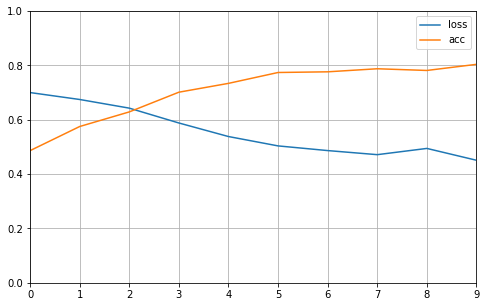

In [0]:
# Plot learning curves
pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1) # set the vertical range to [0-1]
plt.show()

In [0]:
# Make test predictions
y_pred = model_2.predict(X_test)

In [0]:
# Test on 2 reviews
print('Predicted prediction:')
print(y_pred[99])
print('----------')
print('Review text:')
print(test_docs[99])
print('----------')
print('Predicted prediction:')
print(y_pred[187])
print('----------')
print('Review text:')
print(test_docs[187])

Predicted prediction:
[0.09684515]
----------
Review text:
Although obviously lowbudget production performances songs movie worth seeing One Walkens musical roles date marvelous dancer singer demonstrates skills well watch Also starring Jason Connery great childrens story likable characters
----------
Predicted prediction:
[0.38425595]
----------
Review text:
premise rates low unfortunately also struggles raise laughs interest Only Hawns wellknown charm allows thin ice Goldies gotta contender actress whos done much career little quality material br


# Model 3: # pre-trained embeddings (300d) with LSTM + sigmoid activation

In [0]:
# Define model
model_3 = Sequential()
model_3.add(embedding_layer_large)
model_3.add(Bidirectional(LSTM(64)))
model_3.add(Dropout(0.5))
model_3.add(Dense(1, activation='sigmoid'))
print(model_3.summary())

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_2 (Embedding)      (None, 588, 300)          2535600   
_________________________________________________________________
bidirectional_4 (Bidirection (None, 128)               186880    
_________________________________________________________________
dropout_4 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_4 (Dense)              (None, 1)                 129       
Total params: 2,722,609
Trainable params: 187,009
Non-trainable params: 2,535,600
_________________________________________________________________
None


In [0]:
# Compile model
model_3.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [0]:
# Fit network
start_time = time.time()
history = model_3.fit(X_train, y_train, epochs=10, batch_size=64, verbose=2)
elapsed_time = time.time() - start_time
print('--------------------------')
print('Training time in seconds: ', round(elapsed_time,2))
print('--------------------------')

# Save models locally after fitting
save_dir = "results/"
model_name = 'keras_rnn_model_3.h5'
model_path = os.path.join(save_dir, model_name)
model_3.save(model_path)
print('Saved trained model at %s ' % model_path)
print('--------------------------')

Epoch 1/10
 - 25s - loss: 0.6904 - acc: 0.5262
Epoch 2/10
 - 23s - loss: 0.6461 - acc: 0.6438
Epoch 3/10
 - 24s - loss: 0.5854 - acc: 0.7087
Epoch 4/10
 - 24s - loss: 0.4993 - acc: 0.7725
Epoch 5/10
 - 24s - loss: 0.4526 - acc: 0.7975
Epoch 6/10
 - 24s - loss: 0.4017 - acc: 0.8263
Epoch 7/10
 - 24s - loss: 0.3398 - acc: 0.8588
Epoch 8/10
 - 24s - loss: 0.3335 - acc: 0.8675
Epoch 9/10
 - 24s - loss: 0.3199 - acc: 0.8725
Epoch 10/10
 - 24s - loss: 0.2601 - acc: 0.8962
--------------------------
Training time in seconds:  241.48
--------------------------
Saved trained model at results/keras_rnn_model_3.h5 
--------------------------


In [0]:
# Final evaluation of the model
scores = model_3.evaluate(X_test, y_test, verbose=0)
print('Testing scores:')
# print("Baseline Error: %.4f" % (100-scores[1]*100))
print("Accuracy score: %.4f" % scores[1])
print("Loss: %.4f" % scores[0])

Testing scores:
Accuracy score: 0.7800
Loss: 0.5014


In [0]:
# # Load the weights
# checkpoint_path = model_path = "results/keras_rnn_model_3.h5"
# # model_name = 'keras_rnn_model_3.h5'
# model_3.load_weights(checkpoint_path)

# # Re-evaluate the model
# scores_revised = model_3.evaluate(X_test, y_test, verbose=0)
# print('Testing scores:')
# print("Accuracy score: %.4f" % scores_revised[1])
# print("Loss: %.4f" % scores_revised[0])

Testing scores:
Accuracy score: 0.7800
Loss: 0.5014


### Figure 4: Learning curves for model 3

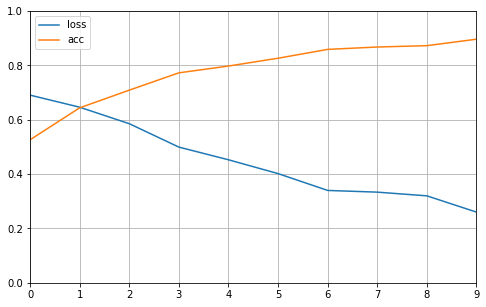

In [0]:
# Plot learning curves
pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1) # set the vertical range to [0-1]
plt.show()

In [0]:
# Make test predictions
y_pred = model_3.predict(X_test)

In [0]:
# Test on 2 reviews
print('Predicted prediction:')
print(y_pred[99])
print('----------')
print('Review text:')
print(test_docs[99])
print('----------')
print('Predicted prediction:')
print(y_pred[187])
print('----------')
print('Review text:')
print(test_docs[187])

Predicted prediction:
[0.01844606]
----------
Review text:
Although obviously lowbudget production performances songs movie worth seeing One Walkens musical roles date marvelous dancer singer demonstrates skills well watch Also starring Jason Connery great childrens story likable characters
----------
Predicted prediction:
[0.49519494]
----------
Review text:
premise rates low unfortunately also struggles raise laughs interest Only Hawns wellknown charm allows thin ice Goldies gotta contender actress whos done much career little quality material br


# Model 4: learned embeddings with LSTM + ReLU activation

In [0]:
model_4 = Sequential()
model_4.add(Embedding(max_features, 128, input_length=max_length))
model_4.add(Bidirectional(LSTM(64)))
model_4.add(Dropout(0.5))
model_4.add(Dense(1, activation='relu'))
print(model_4.summary())

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_5 (Embedding)      (None, 588, 128)          2560000   
_________________________________________________________________
bidirectional_5 (Bidirection (None, 128)               98816     
_________________________________________________________________
dropout_5 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 129       
Total params: 2,658,945
Trainable params: 2,658,945
Non-trainable params: 0
_________________________________________________________________
None


In [0]:
# Compile model
model_4.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [0]:
# Fit network
start_time = time.time()
history = model_4.fit(X_train, y_train, epochs=10, batch_size=64, verbose=2)
elapsed_time = time.time() - start_time
print('--------------------------')
print('Training time in seconds: ', round(elapsed_time,2))
print('--------------------------')

# Save models locally after fitting
save_dir = "results/"
model_name = 'keras_rnn_model_4.h5'
model_path = os.path.join(save_dir, model_name)
model_4.save(model_path)
print('Saved trained model at %s ' % model_path)
print('--------------------------')

Epoch 1/10
 - 28s - loss: 1.3264 - acc: 0.5025
Epoch 2/10
 - 26s - loss: 0.6856 - acc: 0.5787
Epoch 3/10
 - 26s - loss: 0.5810 - acc: 0.7737
Epoch 4/10
 - 26s - loss: 0.6565 - acc: 0.7275
Epoch 5/10
 - 26s - loss: 0.5293 - acc: 0.6100
Epoch 6/10
 - 26s - loss: 0.4240 - acc: 0.8313
Epoch 7/10
 - 26s - loss: 0.2976 - acc: 0.9563
Epoch 8/10
 - 26s - loss: 0.1914 - acc: 0.9575
Epoch 9/10
 - 25s - loss: 0.1049 - acc: 0.9300
Epoch 10/10
 - 25s - loss: 0.0573 - acc: 0.8650
--------------------------
Training time in seconds:  260.68
--------------------------
Saved trained model at results/keras_rnn_model_4.h5 
--------------------------


In [0]:
# Final evaluation of the model
scores = model_4.evaluate(X_test, y_test, verbose=0)
print('Testing scores:')
# print("Baseline Error: %.4f" % (100-scores[1]*100))
print("Accuracy score: %.4f" % scores[1])
print("Loss: %.4f" % scores[0])

Testing scores:
Accuracy score: 0.7400
Loss: 0.6022


In [0]:
# # Load the weights
# checkpoint_path = model_path = "results/keras_rnn_model_4.h5"
# # model_name = 'keras_rnn_model_4.h5'
# model_4.load_weights(checkpoint_path)

# # Re-evaluate the model
# scores_revised = model_4.evaluate(X_test, y_test, verbose=0)
# print('Testing scores:')
# print("Accuracy score: %.4f" % scores_revised[1])
# print("Loss: %.4f" % scores_revised[0])

Testing scores:
Accuracy score: 0.7400
Loss: 0.6022


### Figure 5: Learning curves for model 4

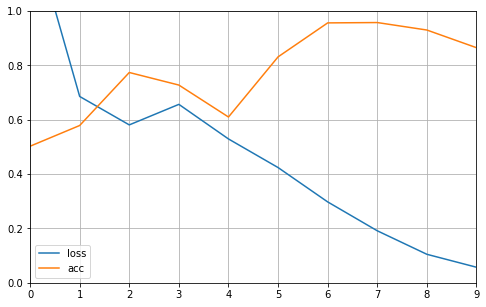

In [0]:
# Plot learning curves
pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1) # set the vertical range to [0-1]
plt.show()

In [0]:
# Make test predictions
y_pred = model_4.predict(X_test)

In [0]:
# Test on 2 reviews
print('Predicted prediction:')
print(y_pred[99])
print('----------')
print('Review text:')
print(test_docs[99])
print('----------')
print('Predicted prediction:')
print(y_pred[187])
print('----------')
print('Review text:')
print(test_docs[187])

Predicted prediction:
[0.7112041]
----------
Review text:
Although obviously lowbudget production performances songs movie worth seeing One Walkens musical roles date marvelous dancer singer demonstrates skills well watch Also starring Jason Connery great childrens story likable characters
----------
Predicted prediction:
[0.52824414]
----------
Review text:
premise rates low unfortunately also struggles raise laughs interest Only Hawns wellknown charm allows thin ice Goldies gotta contender actress whos done much career little quality material br


# Model 5: pre-trained embeddings (100d) with LSTM + ReLU activation

In [0]:
# Define model
model_5 = Sequential()
model_5.add(embedding_layer_small)
model_5.add(Bidirectional(LSTM(64)))
model_5.add(Dropout(0.5))
model_5.add(Dense(1, activation='relu'))
print(model_5.summary())

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 588, 100)          845200    
_________________________________________________________________
bidirectional_6 (Bidirection (None, 128)               84480     
_________________________________________________________________
dropout_6 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_6 (Dense)              (None, 1)                 129       
Total params: 929,809
Trainable params: 84,609
Non-trainable params: 845,200
_________________________________________________________________
None


In [0]:
# Compile model
model_5.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [0]:
# Fit network
start_time = time.time()
history = model_5.fit(X_train, y_train, epochs=10, batch_size=64, verbose=2)
elapsed_time = time.time() - start_time
print('--------------------------')
print('Training time in seconds: ', round(elapsed_time,2))
print('--------------------------')

# Save models locally after fitting
save_dir = "results/"
model_name = 'keras_rnn_model_5.h5'
model_path = os.path.join(save_dir, model_name)
model_5.save(model_path)
print('Saved trained model at %s ' % model_path)
print('--------------------------')

Epoch 1/10
 - 26s - loss: 1.6345 - acc: 0.5175
Epoch 2/10
 - 24s - loss: 0.9490 - acc: 0.4925
Epoch 3/10
 - 24s - loss: 0.9786 - acc: 0.4788
Epoch 4/10
 - 23s - loss: 0.8335 - acc: 0.5262
Epoch 5/10
 - 24s - loss: 0.7562 - acc: 0.5288
Epoch 6/10
 - 24s - loss: 0.7081 - acc: 0.5650
Epoch 7/10
 - 23s - loss: 0.7292 - acc: 0.5425
Epoch 8/10
 - 24s - loss: 0.7816 - acc: 0.5225
Epoch 9/10
 - 24s - loss: 0.7126 - acc: 0.5337
Epoch 10/10
 - 23s - loss: 0.6901 - acc: 0.5563
--------------------------
Training time in seconds:  241.25
--------------------------
Saved trained model at results/keras_rnn_model_5.h5 
--------------------------


In [0]:
# Final evaluation of the model
scores = model_5.evaluate(X_test, y_test, verbose=0)
print('Testing scores:')
# print("Baseline Error: %.4f" % (100-scores[1]*100))
print("Accuracy score: %.4f" % scores[1])
print("Loss: %.4f" % scores[0])

Testing scores:
Accuracy score: 0.5600
Loss: 0.6782


In [0]:
# # Load the weights
# checkpoint_path = model_path = "results/keras_rnn_model_5.h5"
# # model_name = 'keras_rnn_model_4.h5'
# model_5.load_weights(checkpoint_path)

# # Re-evaluate the model
# scores_revised = model_5.evaluate(X_test, y_test, verbose=0)
# print('Testing scores:')
# print("Accuracy score: %.4f" % scores_revised[1])
# print("Loss: %.4f" % scores_revised[0])

Testing scores:
Accuracy score: 0.5600
Loss: 0.6782


### Figure 6: Learning curves for model 5

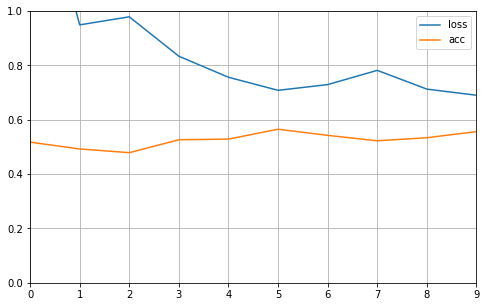

In [0]:
# Plot learning curves
pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1) # set the vertical range to [0-1]
plt.show()

In [0]:
# Make test predictions
y_pred = model_5.predict(X_test)

In [0]:
# Test on 2 reviews
print('Predicted prediction:')
print(y_pred[99])
print('----------')
print('Review text:')
print(test_docs[99])
print('----------')
print('Predicted prediction:')
print(y_pred[187])
print('----------')
print('Review text:')
print(test_docs[187])

Predicted prediction:
[0.3794259]
----------
Review text:
Although obviously lowbudget production performances songs movie worth seeing One Walkens musical roles date marvelous dancer singer demonstrates skills well watch Also starring Jason Connery great childrens story likable characters
----------
Predicted prediction:
[0.5480095]
----------
Review text:
premise rates low unfortunately also struggles raise laughs interest Only Hawns wellknown charm allows thin ice Goldies gotta contender actress whos done much career little quality material br


# Model 6: pre-trained embeddings (300d) with LSTM + ReLU activation

In [0]:
# Define model
model_6 = Sequential()
model_6.add(embedding_layer_large)
model_6.add(Bidirectional(LSTM(64)))
model_6.add(Dropout(0.5))
model_6.add(Dense(1, activation='relu'))
print(model_6.summary())

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_2 (Embedding)      (None, 588, 300)          2535600   
_________________________________________________________________
bidirectional_7 (Bidirection (None, 128)               186880    
_________________________________________________________________
dropout_7 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_7 (Dense)              (None, 1)                 129       
Total params: 2,722,609
Trainable params: 187,009
Non-trainable params: 2,535,600
_________________________________________________________________
None


In [0]:
# Compile model
model_6.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [0]:
# Fit network
start_time = time.time()
history = model_6.fit(X_train, y_train, epochs=10, batch_size=64, verbose=2)
elapsed_time = time.time() - start_time
print('--------------------------')
print('Training time in seconds: ', round(elapsed_time,2))
print('--------------------------')

# Save models locally after fitting
save_dir = "results/"
model_name = 'keras_rnn_model_6.h5'
model_path = os.path.join(save_dir, model_name)
model_6.save(model_path)
print('Saved trained model at %s ' % model_path)
print('--------------------------')

Epoch 1/10
 - 27s - loss: 1.9822 - acc: 0.4587
Epoch 2/10
 - 24s - loss: 0.8187 - acc: 0.5450
Epoch 3/10
 - 23s - loss: 0.7823 - acc: 0.5587
Epoch 4/10
 - 24s - loss: 0.6958 - acc: 0.6038
Epoch 5/10
 - 24s - loss: 0.6557 - acc: 0.6187
Epoch 6/10
 - 24s - loss: 0.6869 - acc: 0.6187
Epoch 7/10
 - 24s - loss: 0.6220 - acc: 0.6575
Epoch 8/10
 - 23s - loss: 0.6054 - acc: 0.6613
Epoch 9/10
 - 24s - loss: 0.6007 - acc: 0.6950
Epoch 10/10
 - 24s - loss: 0.5687 - acc: 0.7175
--------------------------
Training time in seconds:  243.03
--------------------------
Saved trained model at results/keras_rnn_model_6.h5 
--------------------------


In [0]:
# Final evaluation of the model
scores = model_6.evaluate(X_test, y_test, verbose=0)
print('Testing scores:')
# print("Baseline Error: %.4f" % (100-scores[1]*100))
print("Accuracy score: %.4f" % scores[1])
print("Loss: %.4f" % scores[0])

Testing scores:
Accuracy score: 0.6400
Loss: 0.5835


In [0]:
# # Load the weights
# checkpoint_path = model_path = "results/keras_rnn_model_6.h5"
# # model_name = 'keras_rnn_model_6.h5'
# model_6.load_weights(checkpoint_path)

# # Re-evaluate the model
# scores_revised = model_6.evaluate(X_test, y_test, verbose=0)
# print('Testing scores:')
# print("Accuracy score: %.4f" % scores_revised[1])
# print("Loss: %.4f" % scores_revised[0])

Testing scores:
Accuracy score: 0.6400
Loss: 0.5835


### Figure 7: Learning curves for model 6

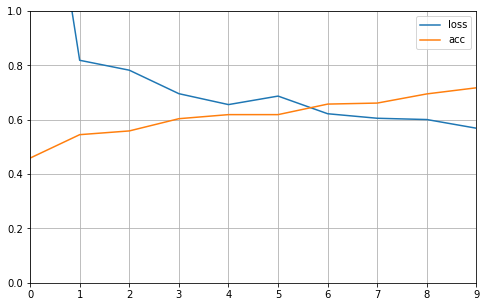

In [0]:
# Plot learning curves
pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1) # set the vertical range to [0-1]
plt.show()

In [0]:
# Make test predictions
y_pred = model_6.predict(X_test)

In [0]:
# Test on 2 reviews
print('Predicted prediction:')
print(y_pred[99])
print('----------')
print('Review text:')
print(test_docs[99])
print('----------')
print('Predicted prediction:')
print(y_pred[187])
print('----------')
print('Review text:')
print(test_docs[187])

Predicted prediction:
[0.17665206]
----------
Review text:
Although obviously lowbudget production performances songs movie worth seeing One Walkens musical roles date marvelous dancer singer demonstrates skills well watch Also starring Jason Connery great childrens story likable characters
----------
Predicted prediction:
[0.5807091]
----------
Review text:
premise rates low unfortunately also struggles raise laughs interest Only Hawns wellknown charm allows thin ice Goldies gotta contender actress whos done much career little quality material br


# Model 7: learned embedding with convolutional and pooling layers

In [0]:
# Model 7
model_7 = Sequential()
model_7.add(Embedding(vocab_size, 100, input_length=max_length))
model_7.add(Conv1D(filters=32, kernel_size=8, activation='relu'))
model_7.add(MaxPooling1D(pool_size=2))
model_7.add(Flatten())
model_7.add(Dense(10, activation='relu'))
model_7.add(Dense(1, activation='sigmoid'))
print(model_7.summary())


Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_6 (Embedding)      (None, 588, 100)          845200    
_________________________________________________________________
conv1d_1 (Conv1D)            (None, 581, 32)           25632     
_________________________________________________________________
max_pooling1d_1 (MaxPooling1 (None, 290, 32)           0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 9280)              0         
_________________________________________________________________
dense_8 (Dense)              (None, 10)                92810     
_________________________________________________________________
dense_9 (Dense)              (None, 1)                 11        
Total params: 963,653
Trainable params: 963,653
Non-trainable params: 0
_______________________________________________

In [0]:
# Compile network
model_7.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [0]:
# Fit network
start_time = time.time()
history = model_7.fit(X_train, y_train, epochs=10, verbose=2, batch_size=64)
elapsed_time = time.time() - start_time
print('--------------------------')
print('Training time in seconds: ', round(elapsed_time,2))
print('--------------------------')

# Save models locally after fitting
save_dir = "results/"
model_name = 'keras_rnn_model_7.h5'
model_path = os.path.join(save_dir, model_name)
model_7.save(model_path)
print('Saved trained model at %s ' % model_path)
print('--------------------------')

Epoch 1/10
 - 8s - loss: 0.6944 - acc: 0.5050
Epoch 2/10
 - 0s - loss: 0.6754 - acc: 0.6388
Epoch 3/10
 - 0s - loss: 0.5892 - acc: 0.9450
Epoch 4/10
 - 0s - loss: 0.3959 - acc: 0.9713
Epoch 5/10
 - 0s - loss: 0.1582 - acc: 0.9850
Epoch 6/10
 - 0s - loss: 0.0400 - acc: 0.9925
Epoch 7/10
 - 0s - loss: 0.0115 - acc: 0.9988
Epoch 8/10
 - 0s - loss: 0.0049 - acc: 1.0000
Epoch 9/10
 - 0s - loss: 0.0027 - acc: 1.0000
Epoch 10/10
 - 0s - loss: 0.0019 - acc: 1.0000
--------------------------
Training time in seconds:  8.74
--------------------------
Saved trained model at results/keras_rnn_model_7.h5 
--------------------------


In [0]:
# Final evaluation of the model
scores = model_7.evaluate(X_test, y_test, verbose=0)
print('Testing scores:')
# print("Baseline Error: %.2f%%" % (100-scores[1]*100))
print("Accuracy score: %.4f" % scores[1])
print("Loss: %.4f" % scores[0])

Testing scores:
Accuracy score: 0.8600
Loss: 0.3091


In [0]:
# # Load the weights
# checkpoint_path = model_path = "results/keras_rnn_model_7.h5"
# # model_name = 'keras_rnn_model_7.h5'
# model_7.load_weights(checkpoint_path)

# # Re-evaluate the model
# scores_revised = model_7.evaluate(X_test, y_test, verbose=0)
# print('Testing scores:')
# print("Accuracy score: %.4f" % scores_revised[1])
# print("Loss: %.4f" % scores_revised[0])

Testing scores:
Accuracy score: 0.8600
Loss: 0.3091


### Figure 8: Learning curves for model 8

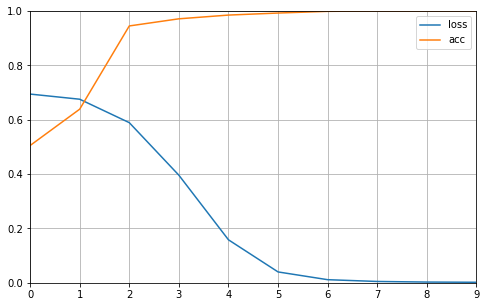

In [0]:
# Plot learning curves
pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1) # set the vertical range to [0-1]
plt.show()

In [0]:
# Make test predictions
y_pred = model_7.predict(X_test)

In [0]:
# Test on 2 reviews
print('Predicted prediction:')
print(y_pred[99])
print('----------')
print('Review text:')
print(test_docs[99])
print('----------')
print('Predicted prediction:')
print(y_pred[187])
print('----------')
print('Review text:')
print(test_docs[187])

Predicted prediction:
[0.21395832]
----------
Review text:
Although obviously lowbudget production performances songs movie worth seeing One Walkens musical roles date marvelous dancer singer demonstrates skills well watch Also starring Jason Connery great childrens story likable characters
----------
Predicted prediction:
[0.4227588]
----------
Review text:
premise rates low unfortunately also struggles raise laughs interest Only Hawns wellknown charm allows thin ice Goldies gotta contender actress whos done much career little quality material br


# Model 8: pre-trained embedding (100d) with convolutional and pooling layers

In [0]:
# Define model
model_8 = Sequential()
model_8.add(embedding_layer_small)
model_8.add(Conv1D(filters=128, kernel_size=8, activation='relu'))
model_8.add(MaxPooling1D(pool_size=2))
model_8.add(Flatten())
model_8.add(Dense(1, activation='sigmoid'))
print(model_8.summary())

Model: "sequential_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 588, 100)          845200    
_________________________________________________________________
conv1d_2 (Conv1D)            (None, 581, 128)          102528    
_________________________________________________________________
max_pooling1d_2 (MaxPooling1 (None, 290, 128)          0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 37120)             0         
_________________________________________________________________
dense_10 (Dense)             (None, 1)                 37121     
Total params: 984,849
Trainable params: 139,649
Non-trainable params: 845,200
_________________________________________________________________
None


In [0]:
# Compile network
model_8.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [0]:
# Fit network
start_time = time.time()
history = model_8.fit(X_train, y_train, epochs=10, verbose=2, batch_size=64)
elapsed_time = time.time() - start_time
print('--------------------------')
print('Training time in seconds: ', round(elapsed_time,2))
print('--------------------------')

# Save models locally after fitting
save_dir = "results/"
model_name = 'keras_rnn_model_8.h5'
model_path = os.path.join(save_dir, model_name)
model_8.save(model_path)
print('Saved trained model at %s ' % model_path)
print('--------------------------')

Epoch 1/10
 - 2s - loss: 0.7693 - acc: 0.5212
Epoch 2/10
 - 0s - loss: 0.6214 - acc: 0.6975
Epoch 3/10
 - 0s - loss: 0.5125 - acc: 0.8237
Epoch 4/10
 - 0s - loss: 0.4041 - acc: 0.8438
Epoch 5/10
 - 0s - loss: 0.3161 - acc: 0.8800
Epoch 6/10
 - 0s - loss: 0.2226 - acc: 0.9587
Epoch 7/10
 - 0s - loss: 0.1557 - acc: 0.9800
Epoch 8/10
 - 0s - loss: 0.1044 - acc: 0.9950
Epoch 9/10
 - 0s - loss: 0.0730 - acc: 0.9975
Epoch 10/10
 - 0s - loss: 0.0551 - acc: 1.0000
--------------------------
Training time in seconds:  3.61
--------------------------
Saved trained model at results/keras_rnn_model_8.h5 
--------------------------


In [0]:
# Final evaluation of the model
scores = model_8.evaluate(X_test, y_test, verbose=0)
print('Testing scores:')
# print("Baseline Error: %.4f" % (100-scores[1]*100))
print("Accuracy score: %.4f" % scores[1])
print("Loss: %.4f" % scores[0])

Testing scores:
Accuracy score: 0.7250
Loss: 0.6683


In [0]:
# # Load the weights
# checkpoint_path = model_path = "results/keras_rnn_model_8.h5"
# # model_name = 'keras_rnn_model_8.h5'
# model_8.load_weights(checkpoint_path)

# # Re-evaluate the model
# scores_revised = model_8.evaluate(X_test, y_test, verbose=0)
# print('Testing scores:')
# print("Accuracy score: %.4f" % scores_revised[1])
# print("Loss: %.4f" % scores_revised[0])

Testing scores:
Accuracy score: 0.7250
Loss: 0.6683


### Figure 9: Learning curves for model 8

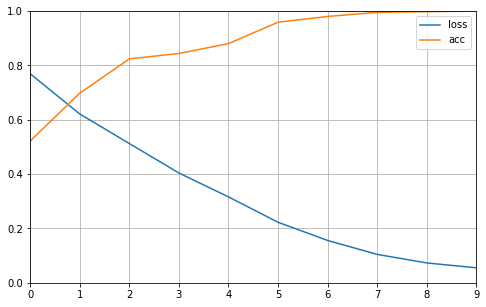

In [0]:
# Plot learning curves
pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1) # set the vertical range to [0-1]
plt.show()

In [0]:
# Make test predictions
y_pred = model_8.predict(X_test)

In [0]:
# Test on 2 reviews
print('Predicted prediction:')
print(y_pred[99])
print('----------')
print('Review text:')
print(test_docs[99])
print('----------')
print('Predicted prediction:')
print(y_pred[187])
print('----------')
print('Review text:')
print(test_docs[187])

Predicted prediction:
[0.02216437]
----------
Review text:
Although obviously lowbudget production performances songs movie worth seeing One Walkens musical roles date marvelous dancer singer demonstrates skills well watch Also starring Jason Connery great childrens story likable characters
----------
Predicted prediction:
[0.22648856]
----------
Review text:
premise rates low unfortunately also struggles raise laughs interest Only Hawns wellknown charm allows thin ice Goldies gotta contender actress whos done much career little quality material br


# Model 9: pre-trained embedding (300d) with convolutional and pooling layers

In [0]:
# Define model
model_9 = Sequential()
model_9.add(embedding_layer_large)
model_9.add(Conv1D(filters=128, kernel_size=8, activation='relu'))
model_9.add(MaxPooling1D(pool_size=2))
model_9.add(Flatten())
model_9.add(Dense(1, activation='sigmoid'))
print(model_9.summary())

Model: "sequential_10"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_2 (Embedding)      (None, 588, 300)          2535600   
_________________________________________________________________
conv1d_3 (Conv1D)            (None, 581, 128)          307328    
_________________________________________________________________
max_pooling1d_3 (MaxPooling1 (None, 290, 128)          0         
_________________________________________________________________
flatten_3 (Flatten)          (None, 37120)             0         
_________________________________________________________________
dense_11 (Dense)             (None, 1)                 37121     
Total params: 2,880,049
Trainable params: 344,449
Non-trainable params: 2,535,600
_________________________________________________________________
None


In [0]:
# Compile network
model_9.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [0]:
# Fit network
start_time = time.time()
history = model_9.fit(X_train, y_train, epochs=10, verbose=2, batch_size=64)
elapsed_time = time.time() - start_time
print('--------------------------')
print('Training time in seconds: ', round(elapsed_time,2))
print('--------------------------')

# Save models locally after fitting
save_dir = "results/"
model_name = 'keras_rnn_model_9.h5'
model_path = os.path.join(save_dir, model_name)
model_9.save(model_path)
print('Saved trained model at %s ' % model_path)
print('--------------------------')

Epoch 1/10
 - 3s - loss: 0.7121 - acc: 0.5275
Epoch 2/10
 - 0s - loss: 0.4973 - acc: 0.8600
Epoch 3/10
 - 0s - loss: 0.2860 - acc: 0.9237
Epoch 4/10
 - 0s - loss: 0.1544 - acc: 0.9662
Epoch 5/10
 - 0s - loss: 0.0823 - acc: 0.9975
Epoch 6/10
 - 0s - loss: 0.0448 - acc: 1.0000
Epoch 7/10
 - 0s - loss: 0.0239 - acc: 1.0000
Epoch 8/10
 - 0s - loss: 0.0151 - acc: 1.0000
Epoch 9/10
 - 0s - loss: 0.0107 - acc: 1.0000
Epoch 10/10
 - 0s - loss: 0.0083 - acc: 1.0000
--------------------------
Training time in seconds:  4.96
--------------------------
Saved trained model at results/keras_rnn_model_9.h5 
--------------------------


In [0]:
# Final evaluation of the model
scores = model_9.evaluate(X_test, y_test, verbose=0)
print('Testing scores:')
# print("Baseline Error: %.4f" % (100-scores[1]*100))
print("Accuracy score: %.4f" % scores[1])
print("Loss: %.4f" % scores[0])

Testing scores:
Accuracy score: 0.7550
Loss: 0.6134


In [0]:
# # Load the weights
# checkpoint_path = model_path = "results/keras_rnn_model_9.h5"
# # model_name = 'keras_rnn_model_9.h5'
# model_9.load_weights(checkpoint_path)

# # Re-evaluate the model
# scores_revised = model_9.evaluate(X_test, y_test, verbose=0)
# print('Testing scores:')
# print("Accuracy score: %.4f" % scores_revised[1])
# print("Loss: %.4f" % scores_revised[0])

Testing scores:
Accuracy score: 0.7550
Loss: 0.6134


### Figure 10: Learning curves for model 9

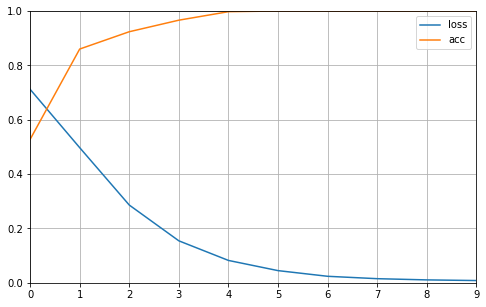

In [0]:
# Plot learning curves
pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1) # set the vertical range to [0-1]
plt.show()

In [0]:
# Make test predictions
y_pred = model_9.predict(X_test)

In [0]:
# Test on 2 reviews
print('Predicted prediction:')
print(y_pred[99])
print('----------')
print('Review text:')
print(test_docs[99])
print('----------')
print('Predicted prediction:')
print(y_pred[187])
print('----------')
print('Review text:')
print(test_docs[187])

Predicted prediction:
[0.0088219]
----------
Review text:
Although obviously lowbudget production performances songs movie worth seeing One Walkens musical roles date marvelous dancer singer demonstrates skills well watch Also starring Jason Connery great childrens story likable characters
----------
Predicted prediction:
[0.3938866]
----------
Review text:
premise rates low unfortunately also struggles raise laughs interest Only Hawns wellknown charm allows thin ice Goldies gotta contender actress whos done much career little quality material br
